# Title

In [ ]:
%%capture
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install scipy
!pip install statsmodels
!pip install xgboost
!pip install lightgbm
!pip install google-colab


##### **Explanation**
We install the required libraies so that we can do analyis on the data provides the breakdown of the libraries is as follows
- Pandas:
  this is the one used to work with the data and transform it into data structure we can work with programtically
- Scikit-learn: this library provides the different staticstical models from the sklearn cateloge of models which includes logistic regression we shall use to model the classification
-  Google Colab: this library provides the interface and tools we need to work with google services which like google drive to store out data that the raw data is persisted
- matplotlib, seabon, numpy and scipy: for other support models and tools to transform data that is in dataframe


# Importing libraries


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report



##### **Explanation**
Here we import the tools we need to work with the analysis of the data, for the python notebook

# Load the data from local repository

In [ ]:
# load the required data
PATH = './data/'
data = pd.read_excel(os.path.join(PATH,'michaelgoboola.xlsx'), sheet_name='Data')
data.head()

##### **Explanation**

With this block of code, we load the data from out local repository (local hard drive)
we define the directory path containng out data an use pandas to read_excel() method to get the data, and then view the data with the head() from the data frame.

# Load date from Google Drive

In [ ]:
# load data from  google drive
drive.mount('/content/drive')
PATH = '/content/drive/My Drive/data/'
data = pd.read_excel(os.path.join(PATH,'michaelgoboola.xlsx'), sheet_name='Data') # change path to your path
data.head()

##### **Explanation**
Alternatively, when using google colab we use the colab libray here to mount our remote drive associated with out google account (google drive)and then define the directory path where we have our data file, we use the pandas, read_excel() method to read the excel data into a dataframe, then call the head() method to view the first 5 rows of the data to ensure we have data.

# Data Preprocessing, Cleaning and Validation

In this section, we do the following as accorded in the instructions
- Data validation
- Data Preprocessing
- Check for multicolinearity
- Prepare the data for Modeling

## Data Validation

#### Data Type Check

In [ ]:
# data type check
data.dtypes

##### **Explanation**
Here we check for the data types that and validate if they conform to wat we expect and we use the dypes on the pandas dataframe to establish that.

we expect the data to be of integer and categorical to be of object type.

#### Check for missing values

In [ ]:
# check for missing values
data.isna().sum()

##### **Explanation**
Here we look loof for empty data points which shows that the data we have here
is all having required data types

#### Check for repeated values

In [ ]:
# check for repeated values
data.duplicated().sum()

##### **Explanation**
Here we do check for data points that are duplicate
and it data shows that we dont have any which indicates so we can proceed.

####  Setup target variable

In [ ]:
# setup target variable
target =  ['OBS#','RESPONSE']
data_target = data[target]
data_target.head()

,OBS#,RESPONSE
0,1,1
1,2,0
2,3,1
3,4,1
4,5,0


##### **Explanation**

#### List Numeric Columns

In [ ]:
# list numeric columns
numericals =['DURATION', 'AMOUNT',
             'INSTALL_RATE', 'AGE', 'NUM_CREDITS', 'NUM_DEPENDENTS']

numericals

['DURATION', 'AMOUNT', 'INSTALL_RATE', 'AGE', 'NUM_CREDITS', 'NUM_DEPENDENTS']

##### **Explanation**

#### List Categorical Columns

In [ ]:
# list categorical columns
categoricals =['CHK_ACCT', 'HISTORY', 'NEW_CAR', 'USED_CAR',
               'FURNITURE', 'RADIO/TV', 'EDUCATION', 'RETRAINING',
               'SAV_ACCT', 'EMPLOYMENT', 'MALE_DIV', 'MALE_SINGLE',
               'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR', 'PRESENT_RESIDENT',
               'REAL_ESTATE', 'PROP_UNKN_NONE', 'OTHER_INSTALL', 'RENT',
               'OWN_RES', 'JOB', 'TELEPHONE',
               'FOREIGN', 'RESPONSE']
categoricals

##### **Explanation**

#### Check for outliers

In [ ]:
# check for outliers
data[numericals].describe()

,DURATION,AMOUNT,INSTALL_RATE,AGE,NUM_CREDITS,NUM_DEPENDENTS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,75.000000,4.000000,2.000000


In [ ]:
data[numericals].skew()

DURATION          1.094184
AMOUNT            1.949628
INSTALL_RATE     -0.531348
AGE               1.020739
NUM_CREDITS       1.272576
NUM_DEPENDENTS    1.909445
dtype: float64

##### **Explanation**

#### Check for data distribution for numerical variables

array([[<Axes: title={'center': 'DURATION'}>,
        <Axes: title={'center': 'AMOUNT'}>],
       [<Axes: title={'center': 'INSTALL_RATE'}>,
        <Axes: title={'center': 'AGE'}>],
       [<Axes: title={'center': 'NUM_CREDITS'}>,
        <Axes: title={'center': 'NUM_DEPENDENTS'}>]], dtype=object)

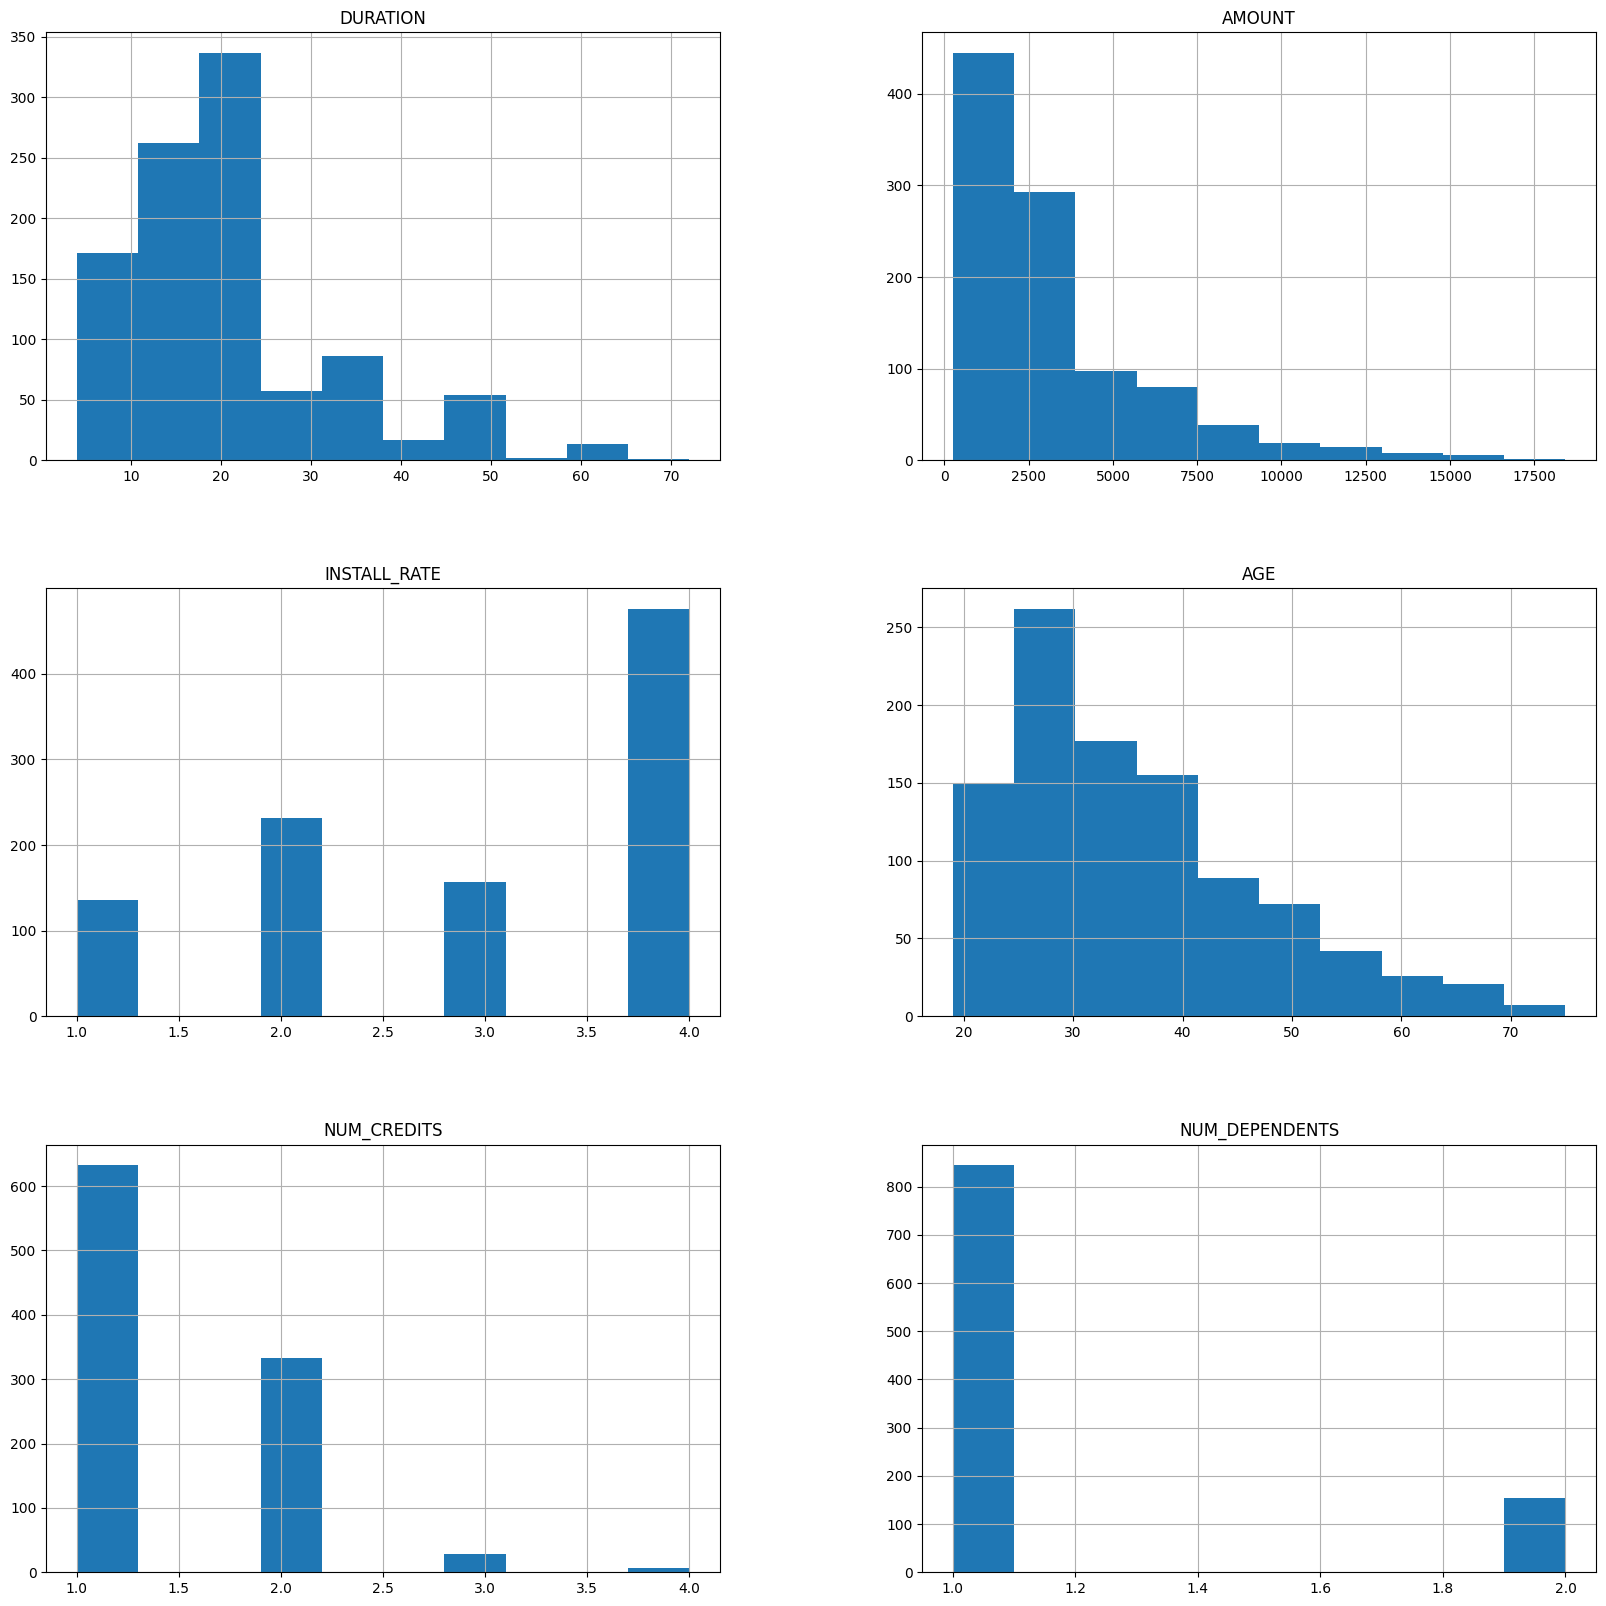

In [ ]:
# check for data distribution for numerical variables
data[numericals].hist(figsize=(20,20))

##### **Explanation**

#### Check for correlation between variables

In [ ]:
# check for correlation between variables
data[numericals].corr()

##### **Explanation**

#### Check for multicollinearity

In [ ]:
# check for multicollinearity
plt.figure(figsize=(20,20))
sns.heatmap(data[numericals].corr(), annot=True)

##### **Explanation**

#### Check for data distribution for target variable

In [ ]:
# check for data distribution for target variable
data_target['RESPONSE'].value_counts()

1    700
0    300
Name: RESPONSE, dtype: int64

##### **Explanation**

#### Check for Counts for Categorical variables

In [ ]:
# check for counts for categorical variables
for i in categoricals:
    print(data[i].value_counts())

##### **Explanation**

#### Get dummy variables for categorical variables

In [ ]:
# get dummy variables for categorical variables
data_with_dummies = pd.get_dummies(data, columns=categoricals, drop_first=True)
data_with_dummies.head()

,OBS#,DURATION,AMOUNT,INSTALL_RATE,AGE,NUM_CREDITS,NUM_DEPENDENTS,CHK_ACCT_1,CHK_ACCT_2,CHK_ACCT_3,...,PROP_UNKN_NONE_1,OTHER_INSTALL_1,RENT_1,OWN_RES_1,JOB_1,JOB_2,JOB_3,TELEPHONE_1,FOREIGN_1,RESPONSE_1
0,1,6,1169,4,67,2,1,0,0,0,...,0,0,0,1,0,1,0,1,0,1
1,2,48,5951,2,22,1,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,3,12,2096,2,49,1,2,0,0,1,...,0,0,0,1,1,0,0,0,0,1
3,4,42,7882,2,45,1,2,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,5,24,4870,3,53,2,2,0,0,0,...,1,0,0,0,0,1,0,0,0,0


##### **Explanation**

#### Plot and Describe the data


In [ ]:
data[categoricals].hist(figsize=(20,20))
plt.show()

##### **Explanation**

# Model building

#### Prepare the Data for modeling

In [ ]:
# Split the data for Test and Training

# split data
X_train, X_test, y_train, y_test = train_test_split(data.drop(['OBS#','RESPONSE'], axis=1),
                                                    data['RESPONSE'],
                                                    test_size=0.3,
                                                    random_state=0)

# categorical columns
cols = ['CHK_ACCT', 'HISTORY', 'NEW_CAR', 'USED_CAR',
               'FURNITURE', 'RADIO/TV', 'EDUCATION', 'RETRAINING',
               'SAV_ACCT', 'EMPLOYMENT', 'MALE_DIV', 'MALE_SINGLE',
               'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR', 'PRESENT_RESIDENT',
               'REAL_ESTATE', 'PROP_UNKN_NONE', 'OTHER_INSTALL', 'RENT',
               'OWN_RES', 'JOB', 'TELEPHONE',
               'FOREIGN']
# get the dummies for categorical data
x_train = pd.get_dummies(X_train, columns=cols, drop_first=True)
Y_train = pd.get_dummies(y_train, columns=cols, drop_first=True)
x_test = pd.get_dummies(X_test, columns=cols, drop_first=True)
Y_test = pd.get_dummies(y_test, columns=cols, drop_first=True)


##### **Explanation**

#### Modeling using the LogisticRegression Classifier

In [ ]:
# model building
# model
model = LogisticRegression()
# fit model
model.fit(x_train, Y_train)

# test model
y_pred = model.predict(x_test)

# evaluate model
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[ 43  43]
 [ 30 184]]
              precision    recall  f1-score   support

           0       0.59      0.50      0.54        86
           1       0.81      0.86      0.83       214

    accuracy                           0.76       300
   macro avg       0.70      0.68      0.69       300
weighted avg       0.75      0.76      0.75       300



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### **Explanation**

#### Modeling using K-nearest Neighbours (KNN)

In [ ]:
# model
knn = KNeighborsClassifier()

# fit the model

knn.fit(x_train, Y_train)

# test model

pred = knn.predict(x_test)

# evaluate the model
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))



[[ 23  63]
 [ 35 179]]
              precision    recall  f1-score   support

           0       0.40      0.27      0.32        86
           1       0.74      0.84      0.79       214

    accuracy                           0.67       300
   macro avg       0.57      0.55      0.55       300
weighted avg       0.64      0.67      0.65       300



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


##### **Explanation**